In [412]:
import seaborn as sns

In [413]:
#sns에서 제공하는 샘플데이터를 가지고 해보자
titanic = sns.load_dataset('titanic')

In [414]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [415]:
titanic['deck'].sort_values()

96       A
174      A
209      A
445      A
647      A
      ... 
884    NaN
885    NaN
886    NaN
888    NaN
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [416]:
# alive를 타겟으로하여 DecisionTreeClassifier이용해 학습을 시켜보고 정확도정밀도재현율f1score를 확인해보자
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [417]:
df = titanic.copy()

In [418]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [419]:
#분석에서 제외시킬 변수(컬럼)삭제하기
df = df.drop(columns=['survived','sex','class','adult_male','embark_town','alone','deck'])
# deck은 결측치가 너무 많아서 제외, 나머지는 내용이 겹치는거라 무쓸모라 제외
df

,pclass,age,sibsp,parch,fare,embarked,who,alive
0,3,22.0,1,0,7.2500,S,man,no
1,1,38.0,1,0,71.2833,C,woman,yes
2,3,26.0,0,0,7.9250,S,woman,yes
3,1,35.0,1,0,53.1000,S,woman,yes
4,3,35.0,0,0,8.0500,S,man,no
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,S,man,no
887,1,19.0,0,0,30.0000,S,woman,yes
888,3,NaN,1,2,23.4500,S,woman,no
889,1,26.0,0,0,30.0000,C,man,yes


In [420]:
# 결측치 있는 행 삭제
df = df.dropna(subset=['age','embarked'])

In [421]:
df.isna().sum()

pclass      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
who         0
alive       0
dtype: int64

In [422]:
#데이터프레임으로부터 타깃을 뽑아내고 학습이 용이하도록 문자열 변수를 원핫인코딩할거야.
target = df['alive']
target

0       no
1      yes
2      yes
3      yes
4       no
      ... 
885     no
886     no
887    yes
889    yes
890     no
Name: alive, Length: 712, dtype: object

In [423]:
df = df.drop(columns='alive')
df

,pclass,age,sibsp,parch,fare,embarked,who
0,3,22.0,1,0,7.2500,S,man
1,1,38.0,1,0,71.2833,C,woman
2,3,26.0,0,0,7.9250,S,woman
3,1,35.0,1,0,53.1000,S,woman
4,3,35.0,0,0,8.0500,S,man
...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,Q,woman
886,2,27.0,0,0,13.0000,S,man
887,1,19.0,0,0,30.0000,S,woman
889,1,26.0,0,0,30.0000,C,man


In [424]:
import pandas as pd
import numpy as np
import seaborn as sns

In [425]:
#원핫인코딩하기: df = pd.get_dummies(df)
df = pd.get_dummies(df)
df

,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,3,22.0,1,0,7.2500,0,0,1,0,1,0
1,1,38.0,1,0,71.2833,1,0,0,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,1,0,0,0,1
886,2,27.0,0,0,13.0000,0,0,1,0,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,0


In [426]:
df.head()

,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,3,22.0,1,0,7.2500,0,0,1,0,1,0
1,1,38.0,1,0,71.2833,1,0,0,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,1,0


In [427]:
target[:5]

0     no
1    yes
2    yes
3    yes
4     no
Name: alive, dtype: object

In [428]:
#훈련데이터와 검증데이터로 분리하기 위한 패키치를 포함
from sklearn.model_selection import train_test_split

In [429]:
#뽑아뒀던 타깃변수(라벨)을 다시 붙이자
df['alive'] = target
df.head()

,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,alive
0,3,22.0,1,0,7.2500,0,0,1,0,1,0,no
1,1,38.0,1,0,71.2833,1,0,0,0,0,1,yes
2,3,26.0,0,0,7.9250,0,0,1,0,0,1,yes
3,1,35.0,1,0,53.1000,0,0,1,0,0,1,yes
4,3,35.0,0,0,8.0500,0,0,1,0,1,0,no


In [430]:
# 훈련데이터랑 테스트데이터로 분리하
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,
                                     stratify = df['alive'],
                                     random_state=1234,
                                     shuffle = True
)

In [431]:
df_train.shape

(498, 12)

In [432]:
df_test.shape

(214, 12)

In [433]:
df_test

,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,alive
152,3,55.5,0,0,8.0500,0,0,1,0,1,0,no
715,3,19.0,0,0,7.6500,0,0,1,0,1,0,no
160,3,44.0,0,1,16.1000,0,0,1,0,1,0,no
6,1,54.0,0,0,51.8625,0,0,1,0,1,0,no
355,3,28.0,0,0,9.5000,0,0,1,0,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
401,3,26.0,0,0,8.0500,0,0,1,0,1,0,no
664,3,20.0,1,0,7.9250,0,0,1,0,1,0,yes
172,3,1.0,1,1,11.1333,0,0,1,1,0,0,yes
668,3,43.0,0,0,8.0500,0,0,1,0,1,0,no


In [434]:
# 학습 모델을 의사결정나무 방식으로 하자. 걔를 갖고있는 패키지를 가져오자
from sklearn import tree

In [435]:
# tree에 있는 의사결정나무 방식의 학습모델인 DecisionTreeClassifier를 만들자
clf = tree.DecisionTreeClassifier(random_state = 1234, max_depth=3)

하이퍼파라미터:
학습 모델에 따라 전달해주는 매개변수값들이 있는데 이 값들의 조절에 따라 학습 성능이 달라질 수 있다
모든 상황에 대하여 변수를 어떻게 하면 좋다라고 정해진 건 없고 데이터마다 달라
이것저것 시도해서 젤 성능 좋은 하이퍼파라미터를 쓰믄댄다
hyperparameter는 기계 학습에서 학습 속도나 옵티마이저 선택과 같은 매개변수로, 학습 프로세스의 세부 사항을 지정하므로 하이퍼파라미터라는 이름이 붙었다. 이는 모델 자체를 결정하는 매개변수와 대조된다.

In [436]:
#훈련 데이터의 문제x와 답y를 분리하
train_x = df_train.drop(columns='alive')
train_y = df_train['alive']

In [437]:
# train_y

In [438]:
clf.fit(X=train_x, y= train_y)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [439]:
test_x = df_test.drop(columns='alive')
test_y = df_test['alive']

In [440]:
test_pred = clf.predict(test_x)

In [441]:
test_pred

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes',
  

In [442]:
test_y

152     no
715     no
160     no
6       no
355     no
      ... 
401     no
664    yes
172    yes
668     no
498     no
Name: alive, Length: 214, dtype: object

In [443]:
#훈련이 잘 됐는지 성능평가를 위한 패키지 포함시키자
from sklearn.metrics import confusion_matrix

In [447]:
import sklearn.metrics as metrics
#정확도 : 전체 데이터 중 내가 맞힌 비율
metrics.accuracy_score(y_true=test_y, y_pred = test_pred)

0.8317757009345794

In [446]:
# 재현율: 진짜 긍정이었던 것 중에 내가 맞힌 거
metrics.recall_score(y_true=test_y, y_pred = test_pred, pos_label = 'yes')

0.7471264367816092

In [448]:
#정밀도 : 내가 긍정이라고 말한 것중에 찐으로 긍정이었던 거
metrics.precision_score(y_true = test_y, y_pred = test_pred, pos_label='yes')

0.8227848101265823

In [449]:
#f1score의 확인: 정밀도와 재현율의 조화평균- 재현율과 정밀도가 둘 다 중요할 때 사욧ㅇ
metrics.f1_score(y_true = test_y, y_pred = test_pred, pos_label='yes' )


0.7831325301204819

In [450]:
#학습한 의사결정나무를 그림으로 그려 보자(시각화)
import matplotlib.pyplot as plt

In [451]:
# 그래프의 크기 설정하기
plt.rcParams.update({
    'figure.dpi':'100', #dot per inch 1인치당 점을 몇개 찍을래
    'figure.figsize':[12,8]
})

In [452]:
train_x.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked_C', 'embarked_Q',
       'embarked_S', 'who_child', 'who_man', 'who_woman'],
      dtype='object')

[Text(0.5, 0.875, 'who_man <= 0.5\ngini = 0.481\nsamples = 100.0%\nvalue = [0.596, 0.404]'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.398\nsamples = 41.8%\nvalue = [0.274, 0.726]'),
 Text(0.125, 0.375, 'fare <= 29.356\ngini = 0.112\nsamples = 23.7%\nvalue = [0.059, 0.941]'),
 Text(0.0625, 0.125, 'gini = 0.215\nsamples = 9.8%\nvalue = [0.122, 0.878]'),
 Text(0.1875, 0.125, 'gini = 0.029\nsamples = 13.9%\nvalue = [0.014, 0.986]'),
 Text(0.375, 0.375, 'fare <= 20.825\ngini = 0.494\nsamples = 18.1%\nvalue = [0.556, 0.444]'),
 Text(0.3125, 0.125, 'gini = 0.484\nsamples = 12.2%\nvalue = [0.41, 0.59]'),
 Text(0.4375, 0.125, 'gini = 0.238\nsamples = 5.8%\nvalue = [0.862, 0.138]'),
 Text(0.75, 0.625, 'pclass <= 1.5\ngini = 0.285\nsamples = 58.2%\nvalue = [0.828, 0.172]'),
 Text(0.625, 0.375, 'age <= 53.0\ngini = 0.488\nsamples = 14.3%\nvalue = [0.577, 0.423]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 11.2%\nvalue = [0.5, 0.5]'),
 Text(0.6875, 0.125, 'gini = 0.231\nsamples = 3.0%\nvalue =

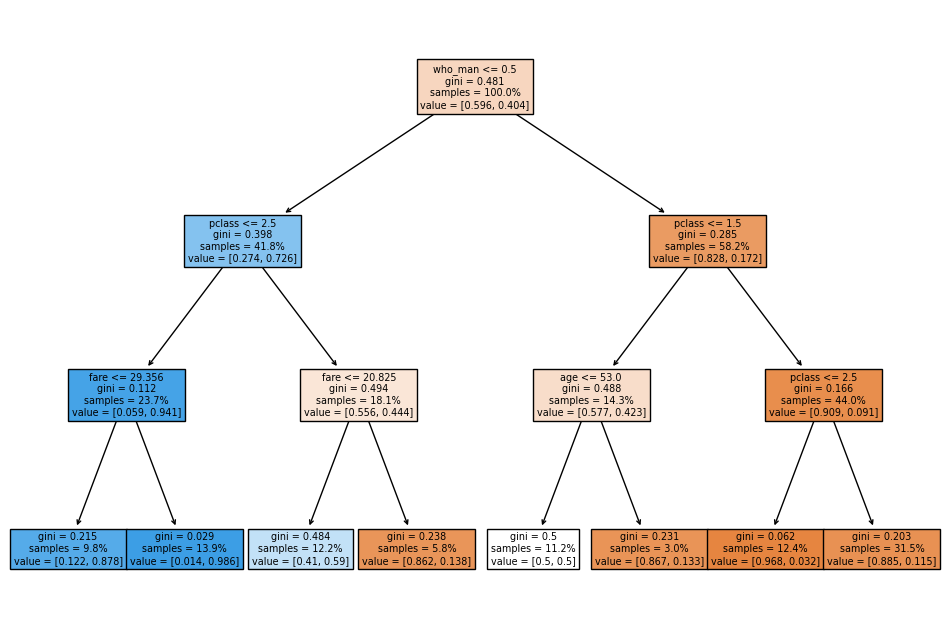

In [454]:
# 학습한 모델clf 를 시각화 해봅시다
# tree안에 함수 있삼(matplotlib을 기반으로 하는..).
tree.plot_tree(
    clf, #학습모델(클래시파이어)를 그려줘
    feature_names=train_x.columns, #공부한 내용의 컬럼ㅇㅣ름을 속성으로 주기
    proportion=True, #각각의 군집이 나눠질 때 비율을 표시할 거야?
    filled = True #색상을 표시할거냐
)

In [444]:
#confusion matrix 만들기
conf_mat = confusion_matrix(y_true=test_y, y_pred = test_pred, labels=['yes','no'])
conf_mat

In [455]:
# confusion matrix도 시각화를 할 수 있다
from sklearn.metrics import ConfusionMatrixDisplay

In [457]:
p = ConfusionMatrixDisplay(
    confusion_matrix = conf_mat,
    display_labels=['yes','no']
)

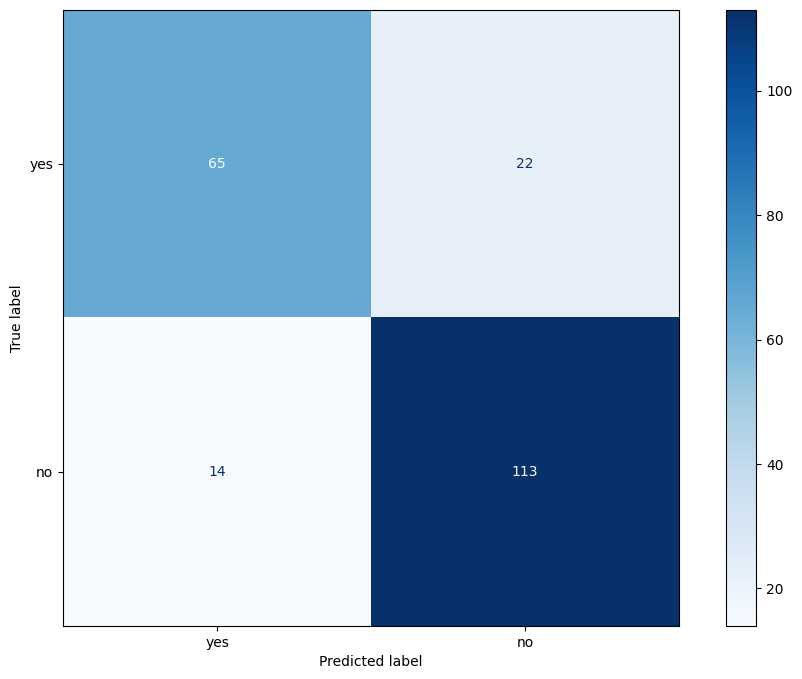

In [459]:
p.plot(cmap='Blues')